<a href="https://colab.research.google.com/github/1dgog/tc3006c_m2_portafoliodeimplementacion/blob/main/m2_con_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 2 Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución.

## Importación de librerías y dataset

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")
!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive"
!ls

Mounted at /content/gdrive
/content
/content/gdrive/MyDrive
 acertados_test.pdf		 Fotos			 real_estate.csv
 acertados_train.pdf		 gender_submission.csv	 real_state.csv
 acertados_valid.pdf		 incorrectas_test.pdf	 scores_test.pdf
 cf_test_con_framework_ini.pdf	 incorrectas_train.pdf	 scores_train.pdf
 cf_test_con_framework_ini.png	 incorrectas_valid.pdf	 scores_train.png
 cf_test_con_framework_ref.pdf	 incorrectos_test.pdf	 scores_train.svg
 cf_test_con_framework_ref.png	 incorrectos_train.pdf	 scores_valid.pdf
 cf_test.png			 incorrectos_valid.pdf	'Servicio Social'
 cf_train.png			 iris.data		'Sin ordenar'
 cf_valid.png			 iris.names		 test.csv
'Colab Notebooks'		 LiFE			 train.csv
'Documentos utiles'		'Plan de estudios'	 Valhalla23.csv
 EBSCO				 PlayDataset.csv	 wine.data
 EGSGLP				 Portugues		 wine.names


### Librerias

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # para hacer visualizacion
from sklearn.neural_network import MLPClassifier # para clasificacion
from sklearn.model_selection import train_test_split # para separacion de datos
from sklearn import metrics
from sklearn.metrics import confusion_matrix # para matrices de confusion
from sklearn.model_selection import cross_val_predict
from google.colab import files # para descargar figuras

### Nombramiento de dataset y visualización inicial

In [4]:
columns = ["alcohol","malic_acid","ash","alcalinity_of_ash", "magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280","proline"] # definir nombres de columna manualmente
df = pd.read_csv('wine.data',names = columns) # abrir el archivo de datos con los nombres dados para las columnas
df = df.reset_index() # se añade un nuevo indice para que el indice previo sea una clasificación que se usara en la siguiente figura.
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity_of_ash     178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color_intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  od280                 178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
   index  alcohol  mal

Se nombran los datasets de entrada y salida con el que será entrenado el modelo. Se están tomando todas las características.

In [5]:
dfInput = df[["alcohol","malic_acid","ash","alcalinity_of_ash", "magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280","proline"]]
dfOutput = df[["index"]]

## Aplicación de redes neuronales, scores y matrices de confusion

### Separación de datos de entrenamiento, validacion y datos de prueba

In [6]:
X_train, X_r, y_train, y_r = train_test_split(dfInput, dfOutput, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_r, y_r, random_state=0)

### Obtención de Scores y matrices de confusión

Se hizo un ciclo for en el que se inicia con 5 capas ocultas y va hasta cuarenta con pasos de 5.

Lo mismo para el segundo que especifica el tamaño de la capa.

Estos datos se almacenan en vectores, tanto para los datos de entrenamiento como para los de test.

In [7]:
scores_train = []
scores_valid= []
scores_test = []
almacenamiento_conf_mat_train = []
almacenamiento_conf_mat_valid = []
almacenamiento_conf_mat_test = []

cont = 0

for ii in range (5,40, 5):
  if cont == 1:
    scores_train.append(jj_scores_train)
    scores_valid.append(jj_scores_valid) # aqui estaba el error
    scores_test.append(jj_scores_test)
    almacenamiento_conf_mat_train.append(jj_mc_train)
    almacenamiento_conf_mat_valid.append(jj_mc_valid) # aqui estaba el error
    almacenamiento_conf_mat_test.append(jj_mc_test)

  cont = 1
  
  jj_scores_train = []
  jj_scores_valid = []
  jj_scores_test = []
  jj_mc_train = []
  jj_mc_valid = []
  jj_mc_test = []

  for jj in range(5,40,5):
    cross_val_predict,
    nnRE = MLPClassifier(hidden_layer_sizes=(ii,jj),  ## cambiar estos parámetros
                        activation='logistic', verbose=False, solver='adam',
                        learning_rate='adaptive', max_iter=2000)
    nnRE.fit(X_train,y_train)
    jj_scores_train.append(nnRE.score(X_train, y_train))
    jj_scores_valid.append(nnRE.score(X_valid, y_valid))
    jj_scores_test.append(nnRE.score(X_test, y_test))
    
    jj_mc_train.append(confusion_matrix(y_train,cross_val_predict(nnRE,X_train,y_train, cv = 10)))
    jj_mc_valid.append(confusion_matrix(y_valid,cross_val_predict(nnRE,X_valid,y_valid, cv = 10)))
    jj_mc_test.append(confusion_matrix(y_test,cross_val_predict(nnRE,X_test,y_test, cv = 5)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

Se hace presenta el cambio de los scores con respecto a los parametros ii y jj del loop, que corresponden al número de capas ocultas y su extención

In [8]:
print("--------------PUNTAJES--------------")
print(np.array(scores_train))
print("--------------")
print(np.array(scores_valid))
print("--------------")
print(np.array(scores_test))

print("-------------- MATRICES DE CONFUSION--------------")
np.info(np.array(scores_train))
print("--------------")
np.info(np.array(scores_valid))
print("--------------")
np.info(np.array(scores_test))

--------------PUNTAJES--------------
[[0.37593985 0.9924812  0.9924812  0.9924812  0.37593985 0.37593985
  0.37593985]
 [0.37593985 0.37593985 0.37593985 0.9924812  0.9924812  0.9924812
  0.9924812 ]
 [0.9924812  0.9924812  0.9924812  0.9924812  0.37593985 0.9924812
  0.9924812 ]
 [1.         0.37593985 0.9924812  0.9924812  0.9924812  0.9924812
  0.9924812 ]
 [0.9924812  0.9924812  0.9924812  0.9924812  0.9924812  0.9924812
  0.9924812 ]
 [0.97744361 0.9924812  0.9924812  0.9924812  0.9924812  0.9924812
  0.9924812 ]]
--------------
[[0.42424242 0.90909091 0.90909091 0.87878788 0.42424242 0.42424242
  0.42424242]
 [0.42424242 0.42424242 0.42424242 0.90909091 0.90909091 0.90909091
  0.93939394]
 [0.90909091 0.90909091 0.90909091 0.90909091 0.42424242 0.93939394
  0.90909091]
 [0.90909091 0.42424242 0.90909091 0.90909091 0.90909091 0.93939394
  0.93939394]
 [0.90909091 0.90909091 0.93939394 0.93939394 0.93939394 0.93939394
  0.93939394]
 [0.90909091 0.93939394 0.93939394 0.93939394 0.93

In [9]:
print(np.array(almacenamiento_conf_mat_train))
print("--------------")
print(np.array(almacenamiento_conf_mat_valid))
print("--------------")
print(np.array(almacenamiento_conf_mat_test))

[[[[18 25  0]
   [ 0 49  1]
   [ 0 24 16]]

  [[13 30  0]
   [ 0 50  0]
   [ 0 28 12]]

  [[15 28  0]
   [ 0 50  0]
   [ 0 24 16]]

  [[ 4 39  0]
   [ 0 50  0]
   [ 0 36  4]]

  [[13 30  0]
   [ 0 50  0]
   [ 0 28 12]]

  [[ 7 36  0]
   [ 0 50  0]
   [ 0 32  8]]

  [[13 30  0]
   [ 0 49  1]
   [ 0 28 12]]]


 [[[21 22  0]
   [ 0 49  1]
   [ 0 20 20]]

  [[30 13  0]
   [ 0 49  1]
   [ 0 12 28]]

  [[ 8 35  0]
   [ 0 50  0]
   [ 0 32  8]]

  [[21 22  0]
   [ 1 48  1]
   [ 0 20 20]]

  [[26 17  0]
   [ 0 49  1]
   [ 0 16 24]]

  [[21 22  0]
   [ 0 48  2]
   [ 0 20 20]]

  [[20 23  0]
   [ 0 50  0]
   [ 0 20 20]]]


 [[[29 14  0]
   [ 0 48  2]
   [ 0 12 28]]

  [[34  9  0]
   [ 1 47  2]
   [ 0  8 32]]

  [[27 16  0]
   [ 1 48  1]
   [ 0 16 24]]

  [[37  6  0]
   [ 0 48  2]
   [ 0  4 36]]

  [[25 18  0]
   [ 1 47  2]
   [ 0 16 24]]

  [[34  9  0]
   [ 1 46  3]
   [ 0  8 32]]

  [[25 18  0]
   [ 1 47  2]
   [ 0 16 24]]]


 [[[34  9  0]
   [ 0 49  1]
   [ 0 12 28]]

  [[38  5  0]
   [ 0 49  1

## Predicciones para README.md

In [10]:
hola = pd.DataFrame(cross_val_predict(nnRE,X_test,y_test, cv = 5))
visualizacion_predicciones = pd.concat([X_test, 
                                        y_test,
                                        hola.reset_index(drop=True)],
                                       axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

## Visualización de matrices de confusión para modelo simple y modelo refinado

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

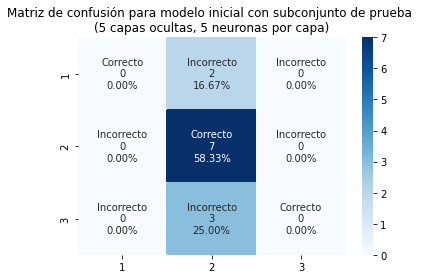

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

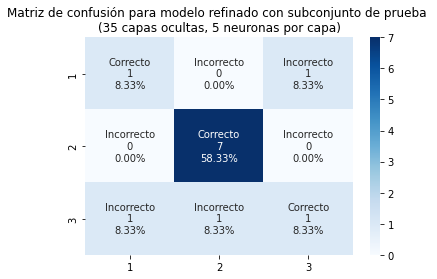

In [11]:
df_cf_test_ini = pd.DataFrame(np.asarray([[0, 2, 0], [0, 7, 0],[0, 3, 0]]), index = [1, 2, 3],
                  columns = [1, 2, 3])
group_names = ["Correcto","Incorrecto","Incorrecto","Incorrecto","Correcto","Incorrecto","Incorrecto","Incorrecto","Correcto"]
group_counts = ["{0:0.0f}".format(value) for value in
                np.array([[0, 2, 0], [0, 7, 0],[0, 3, 0]]).flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     np.array([[0, 2, 0], [0, 7, 0],[0, 3, 0]]).flatten()/np.sum(np.array([[0, 2, 0], [0, 7, 0],[0, 3, 0]]))]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)
sns.heatmap(df_cf_test_ini,annot=labels, fmt="", cmap='Blues')
plt.title("Matriz de confusión para modelo inicial con subconjunto de prueba \n(5 capas ocultas, 5 neuronas por capa)")
plt.savefig('cf_test_con_framework_ini.pdf') 
files.download("cf_test_con_framework_ini.pdf")
plt.show()

df_cf_test_ref = pd.DataFrame(np.asarray([[1, 0, 1], [0, 7, 0],[1, 1, 1]]), index = [1, 2, 3],
                  columns = [1, 2, 3])
group_names = ["Correcto","Incorrecto","Incorrecto","Incorrecto","Correcto","Incorrecto","Incorrecto","Incorrecto","Correcto"]
group_counts = ["{0:0.0f}".format(value) for value in
                np.array([[1, 0, 1], [0, 7, 0],[1, 1, 1]]).flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     np.array([[1, 0, 1], [0, 7, 0],[1, 1, 1]]).flatten()/np.sum(np.array([[1, 0, 1], [0, 7, 0],[1, 1, 1]]))]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)
sns.heatmap(df_cf_test_ref,annot=labels, fmt="", cmap='Blues')
plt.title("Matriz de confusión para modelo refinado con subconjunto de prueba \n(35 capas ocultas, 5 neuronas por capa)")
plt.savefig('cf_test_con_framework_ref.pdf') 
files.download("cf_test_con_framework_ref.pdf")
plt.show()

## Visualización de scores

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

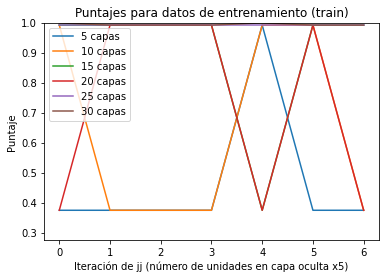

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

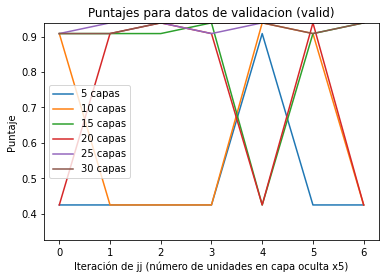

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

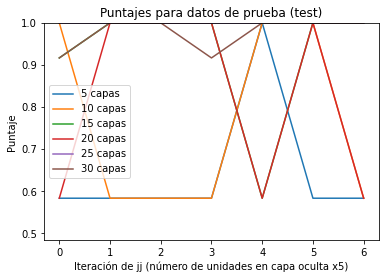

In [ ]:
cont = 5
for a in range(0,len(np.array(scores_train)),1):
  plt.plot(np.array(scores_train)[a], label='%s capas' % cont)
  cont += 5
ax = plt.gca()
ax.set_ylim([np.min(scores_train)-0.1, np.max(scores_train)])
plt.legend()
plt.title('Puntajes para datos de entrenamiento (train)')
plt.ylabel("Puntaje")
plt.xlabel("Iteración de jj (número de unidades en capa oculta x5)")
plt.savefig('scores_train.pdf') 
files.download("scores_train.pdf")
plt.show()

cont = 5
for a in range(0,len(np.array(scores_valid)),1):
  plt.plot(np.array(scores_valid)[a], label='%s capas' % cont)
  cont += 5
ax = plt.gca()
ax.set_ylim([np.min(scores_valid)-0.1, np.max(scores_valid)])
plt.legend()
plt.title('Puntajes para datos de validacion (valid)')
plt.ylabel("Puntaje")
plt.xlabel("Iteración de jj (número de unidades en capa oculta x5)")
plt.savefig('scores_valid.pdf') 
files.download("scores_valid.pdf")
plt.show()

cont = 5
for a in range(0,len(np.array(scores_test)),1):
  plt.plot(np.array(scores_test)[a], label='%s capas' % cont)
  cont += 5
ax = plt.gca()
ax.set_ylim([np.min(scores_test)-.1, np.max(scores_test)])
plt.legend()
plt.title('Puntajes para datos de prueba (test)')
plt.ylabel("Puntaje")
plt.xlabel("Iteración de jj (número de unidades en capa oculta x5)")
plt.savefig('scores_test.pdf') 
files.download("scores_test.pdf")
plt.show()

### Visualización de scores 3D

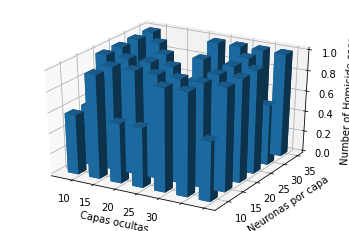

In [25]:
fig = plt.figure()
ax = plt.axes(projection = "3d")
capas = [5,10,15,20,25,30]
unidades = [5,10,15,20,25,30, 35]
data = np.array([[0.58333333, 1,0.58333333, 0.58333333, 1, 1],
                 [0.58333333, 0.58333333, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1, 1],
                 [0.58333333, 1, 1, 1, 0.58333333, 1],
                 [0.58333333, 0.58333333, 1, 1, 1, 1],
                 [0.58333333, 0.91666667, 0.58333333, 1, 0.58333333, 1],
                 [0.58333333, 0.58333333, 1, 1, 1, 1]])

numOfCols = 7
numOfRows = 6

xpos = np.arange(0, numOfCols, 1)
ypos = np.arange(0, numOfRows, 1)
xpos, ypos = np.meshgrid(xpos + 0.5, ypos + 0.5)
 
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(numOfCols * numOfRows)
 
dx = np.ones(numOfRows * numOfCols) * 0.5
dy = np.ones(numOfCols * numOfRows) * 0.5
dz = data.flatten()
 
ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
ax.set_xticklabels(capas)
ax.set_yticklabels(unidades)
 
ax.set_xlabel('Capas ocultas')
ax.set_ylabel('Neuronas por capa')
ax.set_zlabel('Number of Homicide cases')
 
plt.show()

## Visualización de cambio con respecto a matrices de confusión

Para resultados acertados

In [ ]:
sum_correcto_train = []
for ii in range(0,6,1):
  for jj in range(0,6,1):
    sum_correcto_train.append(np.trace(np.array(almacenamiento_conf_mat_train)[ii,jj]))
sum_correcto_valid = []
for ii in range(0,6,1):
  for jj in range(0,6,1):
    sum_correcto_valid.append(np.trace(np.array(almacenamiento_conf_mat_valid)[ii,jj]))
sum_correcto_test = []
for ii in range(0,6,1):
  for jj in range(0,6,1):
    sum_correcto_test.append(np.trace(np.array(almacenamiento_conf_mat_test)[ii,jj]))

print(np.array(sum_correcto_train).transpose())
print(np.array(sum_correcto_valid).transpose())
print(np.array(sum_correcto_test).transpose())

[ 78  72  80  82  73  57 106  98  98  74  81  80 123 106 105 106 110 104
 106 129 113 121 106 123 123 121 121 119 120 103 122 122 129 130 122 130]
[29 20 18 16 15 20 25 28 26 28 26 21 29 27 26 29 26 23 28 30 29 27 27 23
 29 29 30 31 30 31 29 29 26 30 30 30]
[10  8  7  7  9  8 10  8 10 10  9  9  8 10 10  9  7  8 10 10  9  9  9  9
 10 10  9  8  9  9 10  9 10 10 10  9]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

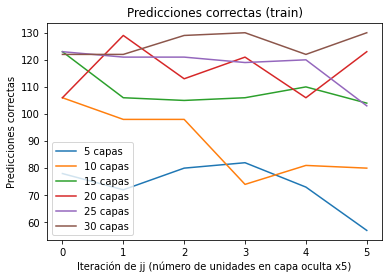

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

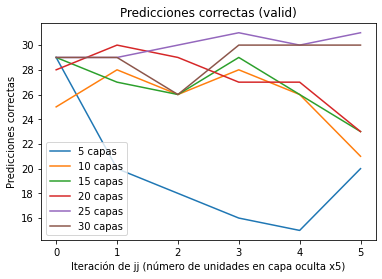

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

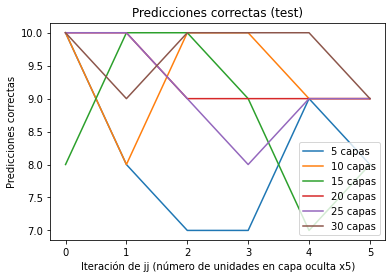

In [ ]:
cont = 5
for a in range(0,len(np.array(sum_correcto_train)),6):
  plt.plot(np.array(sum_correcto_train)[a:a+6], label='%s capas' % cont)
  cont += 5
plt.legend()
plt.title('Predicciones correctas (train)')
plt.ylabel("Predicciones correctas")
plt.xlabel("Iteración de jj (número de unidades en capa oculta x5)")
plt.savefig('acertados_train.pdf')
files.download("acertados_train.pdf")
plt.show()

cont = 5
for a in range(0,len(np.array(sum_correcto_valid)),6):
  plt.plot(np.array(sum_correcto_valid)[a:a+6], label='%s capas' % cont)
  cont += 5
plt.legend()
plt.title('Predicciones correctas (valid)')
plt.ylabel("Predicciones correctas")
plt.xlabel("Iteración de jj (número de unidades en capa oculta x5)")
plt.savefig('acertados_valid.pdf') 
files.download("acertados_valid.pdf")
plt.show()


cont = 5
for a in range(0,len(np.array(sum_correcto_test)),6):
  plt.plot(np.array(sum_correcto_test)[a:a+6], label='%s capas' % cont)
  cont += 5
plt.legend()
plt.ylabel("Predicciones correctas")
plt.title('Predicciones correctas (test)')
plt.xlabel("Iteración de jj (número de unidades en capa oculta x5)")
plt.savefig('acertados_test.pdf')
files.download("acertados_test.pdf")
plt.show()

Para resultados equivocados, se toma la resta de la suma total de los datos en la matriz, restada a los datos correctos

In [ ]:
sum_incorrecto_train = []
for ii in range(0,6,1):
  for jj in range(0,6,1):
    sum_incorrecto_train.append(np.sum(np.array(almacenamiento_conf_mat_train)[ii,jj])-np.trace(np.array(almacenamiento_conf_mat_train)[ii,jj]))

sum_incorrecto_valid = []
for ii in range(0,6,1):
  for jj in range(0,6,1):
    sum_incorrecto_valid.append(np.sum(np.array(almacenamiento_conf_mat_valid)[ii,jj])-np.trace(np.array(almacenamiento_conf_mat_valid)[ii,jj]))

sum_incorrecto_test = []
for ii in range(0,6,1):
  for jj in range(0,6,1):
    sum_incorrecto_test.append(np.sum(np.array(almacenamiento_conf_mat_test)[ii,jj])-np.trace(np.array(almacenamiento_conf_mat_test)[ii,jj]))

print(np.array(sum_incorrecto_train).transpose())
print(np.array(sum_incorrecto_valid).transpose())
print(np.array(sum_incorrecto_test).transpose())

[55 61 53 51 60 76 27 35 35 59 52 53 10 27 28 27 23 29 27  4 20 12 27 10
 10 12 12 14 13 30 11 11  4  3 11  3]
[ 4 13 15 17 18 13  8  5  7  5  7 12  4  6  7  4  7 10  5  3  4  6  6 10
  4  4  3  2  3  2  4  4  7  3  3  3]
[2 4 5 5 3 4 2 4 2 2 3 3 4 2 2 3 5 4 2 2 3 3 3 3 2 2 3 4 3 3 2 3 2 2 2 3]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

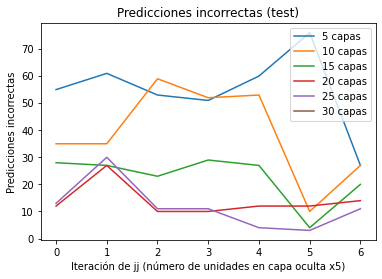

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

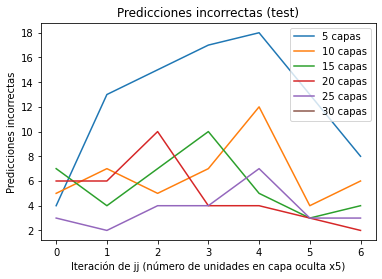

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

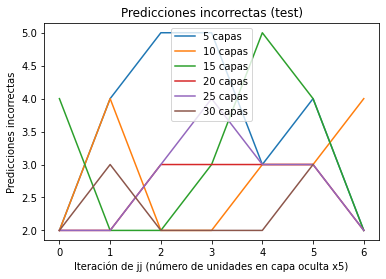

In [ ]:
cont = 0
for a in range(0,len(np.array(sum_incorrecto_train)),7):
  cont += 5
  plt.plot(np.array(sum_incorrecto_train)[a:a+7], label='%s capas' % cont)
plt.legend()
plt.ylabel("Predicciones incorrectas")
plt.title('Predicciones incorrectas (test)')
plt.xlabel("Iteración de jj (número de unidades en capa oculta x5)")
plt.savefig('incorrectas_train.pdf')
files.download("incorrectas_train.pdf")
plt.show()

cont = 0
for a in range(0,len(np.array(sum_incorrecto_valid)),7):
  cont += 5
  plt.plot(np.array(sum_incorrecto_valid)[a:a+7], label='%s capas' % cont)
plt.legend()
plt.ylabel("Predicciones incorrectas")
plt.title('Predicciones incorrectas (test)')
plt.xlabel("Iteración de jj (número de unidades en capa oculta x5)")
plt.savefig('incorrectas_valid.pdf')
files.download("incorrectas_valid.pdf")
plt.show()

cont = 0
for a in range(0,len(np.array(sum_incorrecto_test)),6):
  cont += 5
  plt.plot(np.array(sum_incorrecto_test)[a:a+7], label='%s capas' % cont)
plt.legend()
plt.ylabel("Predicciones incorrectas")
plt.title('Predicciones incorrectas (test)')
plt.xlabel("Iteración de jj (número de unidades en capa oculta x5)")
plt.savefig('incorrectas_test.pdf')
files.download("incorrectas_test.pdf")
plt.show()

## Notas de asesoría 1.

Sesgo y varianza, estan relacionados, tiene que ver con el overfitting. Si tiene poco sesgo es porque tiene mucha varianza, y viceversa

Poner en terminos de bajo, medio y alto. 

No es necesario que sea de varios frameworks, con uno basta.}

Se pueden hacer gráficas de como cambia el score.+

## Asesoría 2

Poner print de valores de entrada, y valores predecidos y esperados.